<a href="https://colab.research.google.com/github/JiaminJIAN/20MA573/blob/master/src/option%20combinations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Question**

Recall that, 


__Written K-strike straddle__ is a portfolio of
- selling K-strike call of one unit
- selling K-strike put of one unit

__Butterfly__ with three stikes $K_1 < K_2 < K_3$ is the portfolio of
- 1 unit of written K-strike straddle
- 1 unit of purchased K-strike call
- 1 unit of purchased K-strike put

Plot a diagram of exercise price versus payoff for the following portfolios:
- written 40-strike straddle
- a butterfly consists of
  - written 40-strike straddle
  - purchased 45-strike call
  - purchased 35-strike put

##**Analysis**

Since the written K-strike straddle is a portfolio combined by selling a K-strike call and a K-strike put, then the payoff will be:

$$f_{1}(S) = -max(S-K, 0) - max(K-S, 0),$$

we can also rewrite the fomula as follow:

$$
f_{1}(S) = 
\begin{cases}
K - S,  & K < S \\
S - K,  & K \geq S,
\end{cases}
$$

where $S$ is the stock price at the maturity time.

And for the butterfly consisted by a $K_{1}$-strike put, a $K_{2}$-strike straddle and a $K_{3}$-strike call when $K_{1} < K_{2} < K_{3}$, the payoff is 

$$f_{2}(S) = max(K_{1} - S, 0) -max(S-K_{2}, 0) - max(K_{2}-S, 0) + max(S - K_{3}, 0),$$

which is equivalent to

$$
f_{2}(S) = 
\begin{cases}
K_{1} - K_{2},  & S < K_{1} \\
S - K_{2},  & K_{1} < S < K_{2}  \\
K_{2} - S, & K_{2} < S < K_{3} \\
K_{2} - K_{3}, & S > K_{3}.
\end{cases}
$$

In there we do not consider the option premium. The formula of $f_{1}(S)$ and $f_{2}(S)$ gives the relationship between exercise price versus payoff of Written K-strike straddle and butterfly.

##**Code**

Now we use code to give the diagram of exercise price versus payoff for written 40-strike straddle.

In [0]:
'''=========
option class init
=========='''
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration
      
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      maturity = self.maturity
      return max([0, (s - k)*otype])

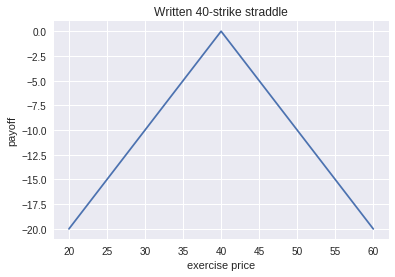

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

#create option instance, maturity is just arbitrarily given
opt1 = VanillaOption(otype = 1, strike = 40, maturity= 1.) 
opt2 = VanillaOption(otype = -1, strike = 40, maturity= 1.)
stk_list = range(20, 61)
payoff_list1 = [opt1.payoff(s) for s in stk_list]
payoff_list2 = [opt2.payoff(s) for s in stk_list]
payoff_list = np.array(payoff_list1) + np.array(payoff_list2)

plt.plot(stk_list, - payoff_list)

#decorations
plt.xlabel('exercise price')
plt.ylabel('payoff')
plt.title('Written 40-strike straddle');
plt.show()

We also can rewrite the code for the written K-strike straddle, we just need to change the payoff function in the Vanillaoption class.

In [0]:
'''=========
option class init
=========='''
class Straddle:
    def __init__(
        self,
        strike = 40.,
        maturity = 1.,
        market_price = 10.):
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration
      
        
    def payoff(self, s): #s: excercise price
      k = self.strike
      maturity = self.maturity
      return - max([0, (s - k)]) - max([0, (k - s)]) 

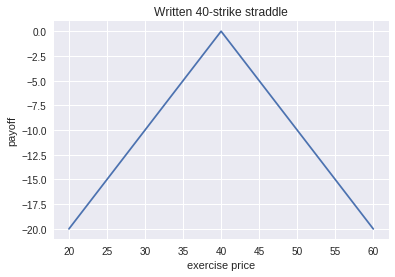

In [0]:
#create option instance, maturity is just arbitrarily given
opt3 = Straddle(strike = 40, maturity= 1.) 
stk_list = range(20, 61)
payoff_list = [opt3.payoff(s) for s in stk_list]
plt.plot(stk_list, payoff_list)

#decorations
plt.xlabel('exercise price')
plt.ylabel('payoff')
plt.title('Written 40-strike straddle');
plt.show()

Then for the 